In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL

In [2]:
(X_train,_y_train), (X_test,_y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

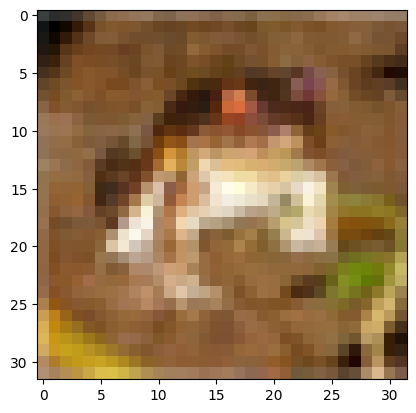

In [4]:
plt.imshow(X_train[0])

In [5]:
lables='''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''

In [6]:
lables=lables.split()

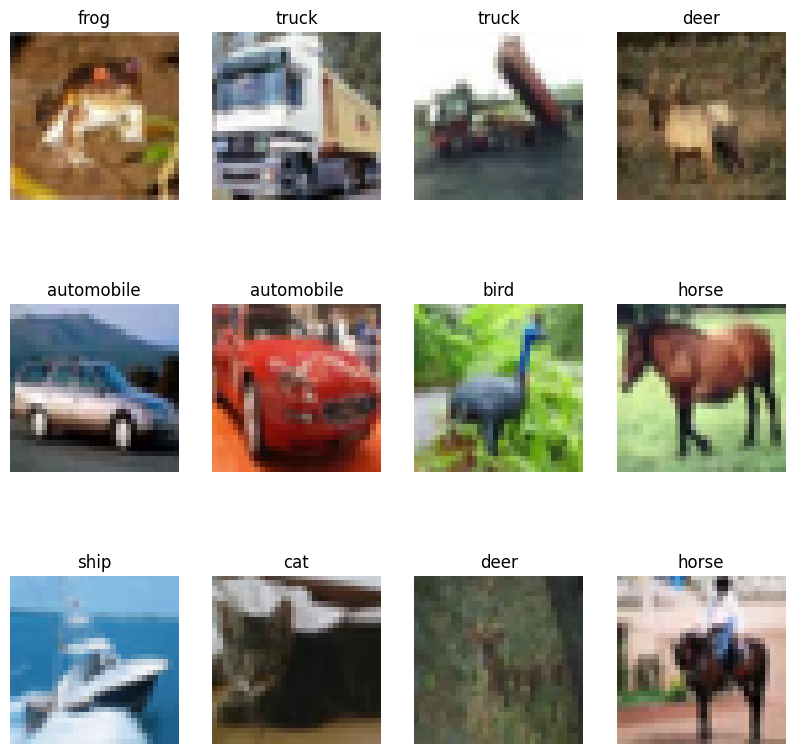

In [7]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(lables[_y_train[i][0]])
    plt.axis("off")

In [8]:
model=keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(32,32,3)),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.2),
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')




])

In [9]:
model.compile(optimizer="Adam",loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [10]:
model.fit(X_train, _y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 6ms/step - loss: 1.9156 - accuracy: 0.2923
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7128 - accuracy: 0.3809
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6100 - accuracy: 0.4147
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5346 - accuracy: 0.4432
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4856 - accuracy: 0.4649
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4528 - accuracy: 0.4769
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4229 - accuracy: 0.4904
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3988 - accuracy: 0.4998
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3830 - accuracy: 0.5057
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step - lo

In [11]:
preds=[np.argmax(i) for i in model.predict(X_test)]

313/313 [==============================] - 1s 2ms/step


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
print(confusion_matrix(preds,_y_test))

[[581  17 164  33  62  27  11  33 114  24]
 [107 776  75  63  24  49  54  35 142 230]
 [ 24   1 351  50 135  41  33  23  14   4]
 [  6   1  27 193  21  94  28  19   7   7]
 [  3   0  36  25 266  24  28  14   0   1]
 [  4   6  59 201  31 452  28  62  14   3]
 [  3   4  86 153 183  63 703  41   9   7]
 [ 17   6  92  91 189  94  24 549   5   8]
 [147  16  45  27  27  25   3  15 603  21]
 [108 173  65 164  62 131  88 209  92 695]]


Text(50.722222222222214, 0.5, 'Predicted')

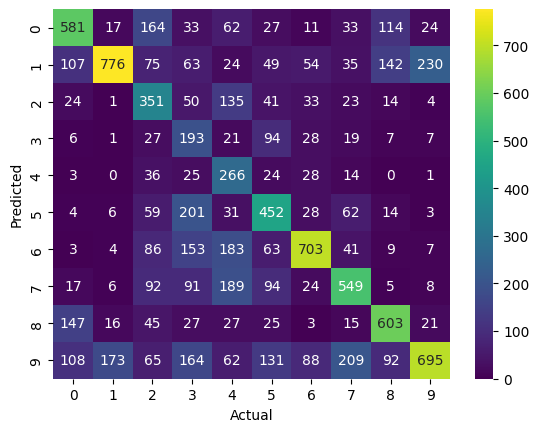

In [14]:
sns.heatmap(confusion_matrix(preds,_y_test),cmap="viridis",fmt="d",annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

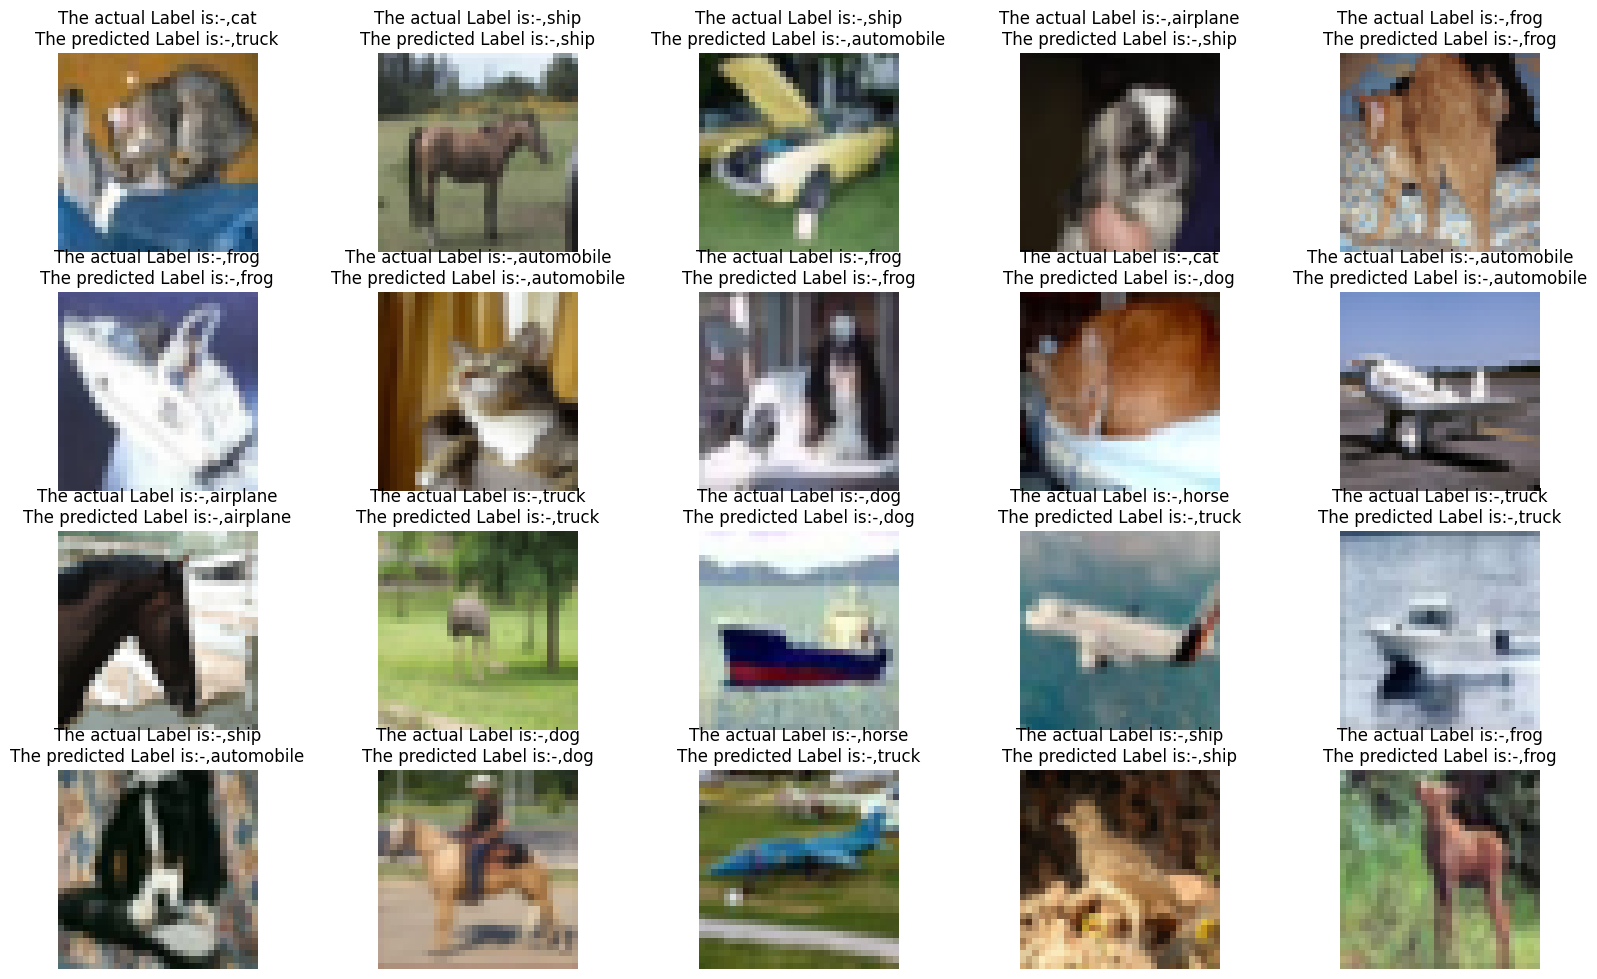

In [15]:
plt.figure(figsize=(20,15))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[-i])
  plt.title(f"The actual Label is:-,{lables[_y_test.reshape(-1,)[i]]}\nThe predicted Label is:-,{lables[preds[i]]}")
  plt.axis("off")

In [16]:
_y_test.reshape(-1,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)